### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
#                  alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

In [8]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'China': 'red', 
          'Spain': 'yellow',
          'Italy': 'grey', 
          'Iran': 'brown', 
          'UK': 'Purple', 
          'S.Korea': 'lightgreen', 
          'France': 'violet', 
#           'Germany': 'lime', 
          'Argentina': 'Teal',
          'Russia': 'cyan', 
          'Mexico': 'Orange', 
          'Brazil': 'darkgreen', 
#           'Belgium': 'cyan',
          'New Zealand': 'lightblue'}

Countries = list(colors.keys())

In [9]:
Deaths = DF.copy()
Deaths[Countries].tail(5)

Country/Region,India,World,US,China,Spain,Italy,Iran,UK,S.Korea,France,Argentina,Russia,Mexico,Brazil,New Zealand
2020-11-16,130519,1327007,246965,4742,41253,45733,41979,52240,494,45122,35727,33184,98861,166014,25
2020-11-17,130993,1338106,248672,4742,41688,46464,42461,52839,496,46346,36106,33619,99026,166699,25
2020-11-18,131578,1349380,250520,4742,42039,47217,42941,53368,498,46772,36347,34068,99528,167455,25
2020-11-19,132162,1360381,252535,4742,42291,47870,43417,53870,501,47201,36532,34525,100104,168061,25
2020-11-20,132726,1372182,254413,4742,42619,48569,43896,54381,503,48341,36790,34980,100823,168613,25


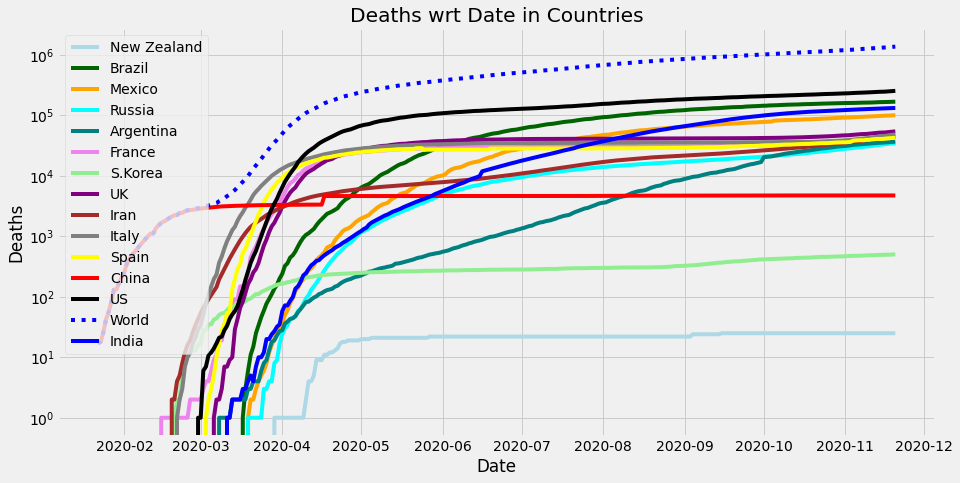

In [10]:
plotter(Deaths, 'Deaths')

In [11]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,China,Spain,Italy,Iran,UK,S.Korea,France,Argentina,Russia,Mexico,Brazil,New Zealand
2020-11-16,449,7863,758,0,484,504,486,214,0,509,291,299,319,216,0
2020-11-17,474,11099,1707,0,435,731,482,599,2,1224,379,435,165,685,0
2020-11-18,585,11274,1848,0,351,753,480,529,2,426,241,449,502,756,0
2020-11-19,584,11001,2015,0,252,653,476,502,3,429,185,457,576,606,0
2020-11-20,564,11801,1878,0,328,699,479,511,2,1140,258,455,719,552,0


In [12]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM #Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,China,Spain,Italy,Iran,UK,S.Korea,France,Argentina,Russia,Mexico,Brazil,New Zealand
2020-11-16,514.49,8102.18,977.01,0.11,278.79,458.32,440.53,337.24,1.51,489.65,281.53,342.34,453.39,421.05,0.0
2020-11-17,509.43,8476.78,1068.26,0.10,298.31,492.40,445.71,369.96,1.58,581.44,293.72,353.92,417.34,454.04,0.0
2020-11-18,518.88,8826.43,1165.73,0.08,304.90,524.98,450.00,389.84,1.63,562.01,287.13,365.81,427.92,491.79,0.0
2020-11-19,527.02,9098.25,1271.88,0.07,298.29,540.98,453.25,403.86,1.80,545.39,274.36,377.21,446.43,506.06,0.0
2020-11-20,531.64,9436.10,1347.65,0.06,302.00,560.73,456.47,417.25,1.82,619.71,272.31,386.93,480.50,511.81,0.0


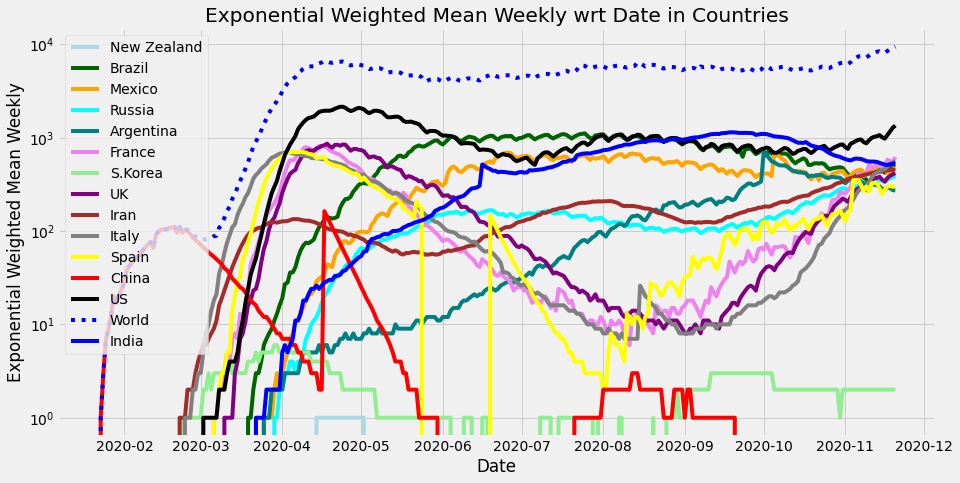

In [13]:
plotter(np.round(AVG), name)

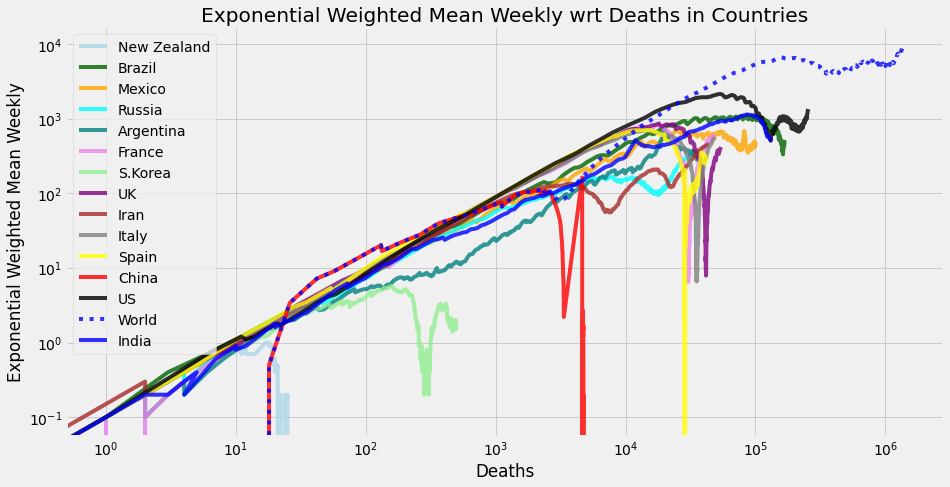

In [14]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

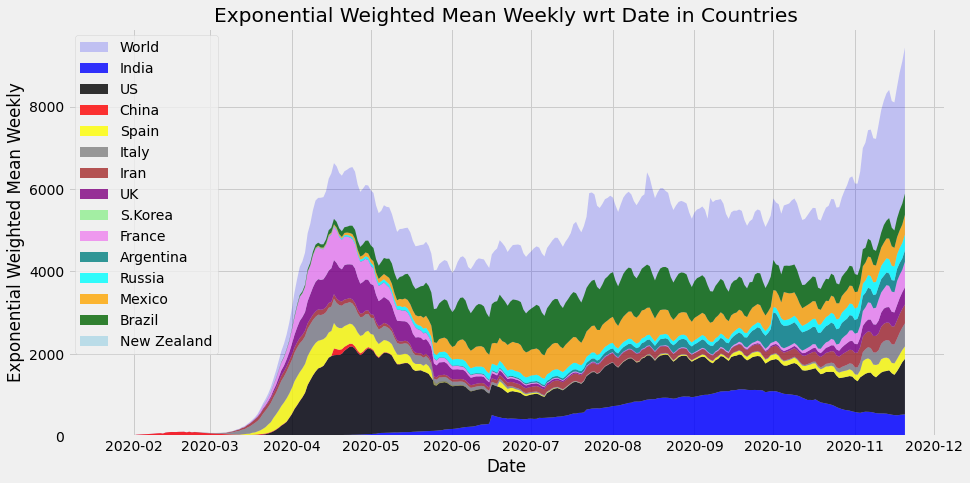

In [15]:
stackplotter(AVG, name)

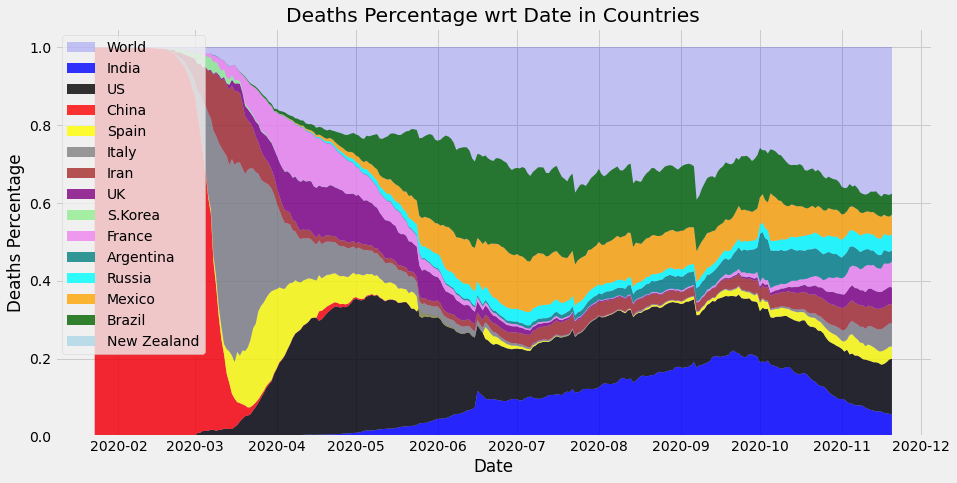

In [16]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [17]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1
Reproductivity[Countries].iloc[-1]

Country/Region
India          0.8945
World          1.2702
US             1.4229
China          1.0000
Spain          0.8584
Italy          2.0856
Iran           1.1878
UK             1.4575
S.Korea        1.0000
France         1.4849
Argentina      0.7649
Russia         1.2680
Mexico         1.0650
Brazil         1.1907
New Zealand    1.0000
Name: 2020-11-20 00:00:00, dtype: float64

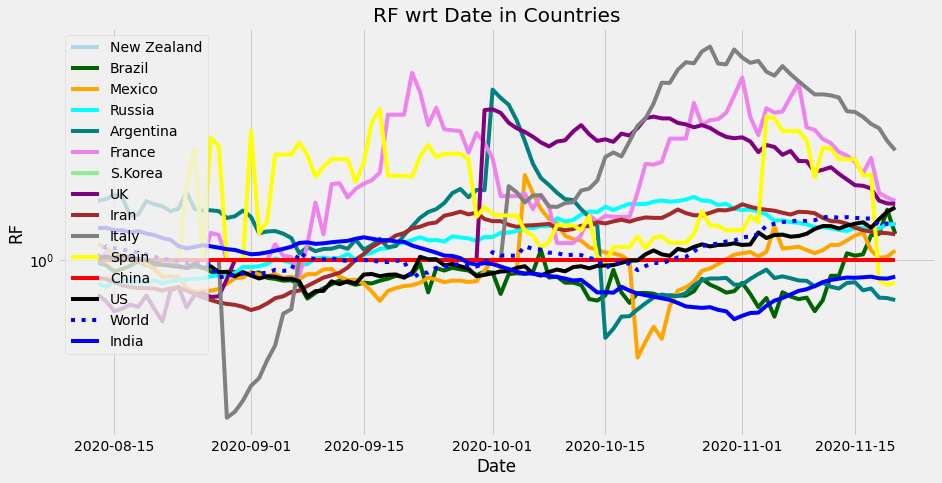

In [18]:
plotter(Reproductivity.tail(100), 'RF')

### Time Adjusted for starting day

In [19]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

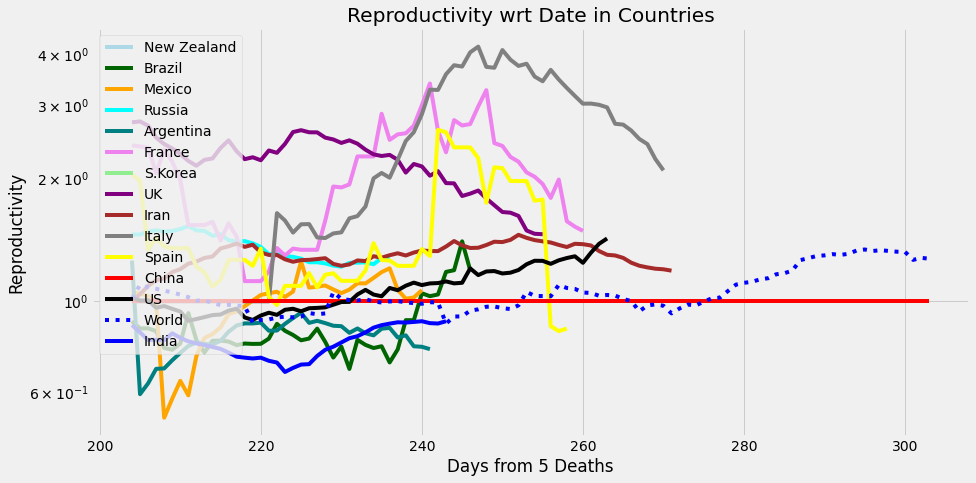

In [20]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

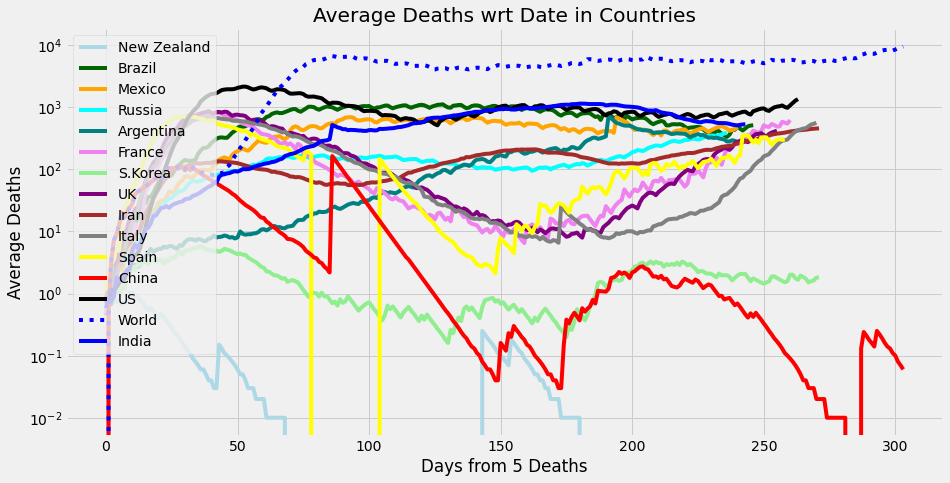

In [21]:
AVG_A = adjust_days(AVG)
plotter(AVG_A, 'Average Deaths', xlabel)

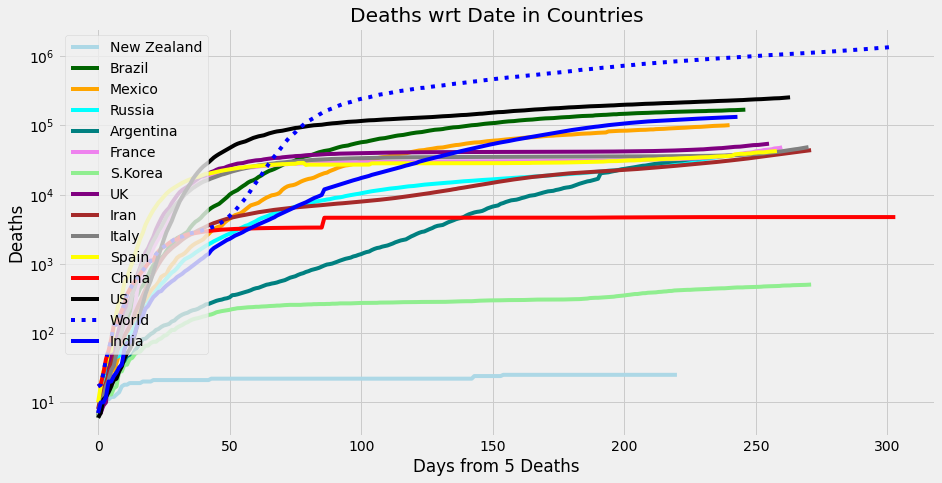

In [22]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [23]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]

In [24]:
LastDay_DF.sort_values('Deaths', ascending = False).head(10)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity
Country,,,,,
World,1372182,11801,9753.71,9436.10,1.2702
US,254413,1878,1441.14,1347.65,1.4229
Brazil,168613,552,553.71,511.81,1.1907
India,132726,564,505.43,531.64,0.8945
Mexico,100823,719,457.00,480.50,1.0650
UK,54381,511,426.43,417.25,1.4575
Italy,48569,699,632.86,560.73,2.0856
France,48341,1140,626.29,619.71,1.4849
Iran,43896,479,473.43,456.47,1.1878


In [25]:
LastDay_DF[LastDay_DF['Weekly_Deaths']>200].sort_values('Weekly_Deaths', ascending = False)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity
Country,,,,,
World,1372182,11801,9753.71,9436.10,1.2702
US,254413,1878,1441.14,1347.65,1.4229
Italy,48569,699,632.86,560.73,2.0856
France,48341,1140,626.29,619.71,1.4849
Brazil,168613,552,553.71,511.81,1.1907
India,132726,564,505.43,531.64,0.8945
Iran,43896,479,473.43,456.47,1.1878
Poland,12714,626,459.29,411.20,1.7075
Mexico,100823,719,457.00,480.50,1.0650


### Pie Chart

In [26]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:]
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  9436


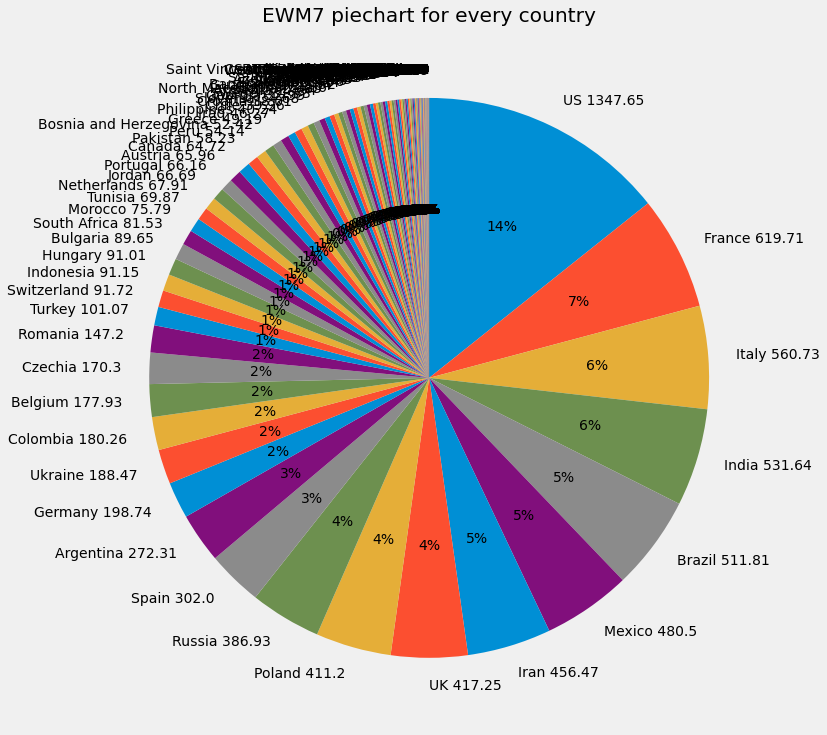

In [27]:
piechart('EWM7')

In [28]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2020-11-21
